In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# 1. Choose a random p in (0,1)
p = np.random.rand()
print(f"True p: {p:.3f}")

True p: 0.637


# Part 4

In [14]:
# 2. Define the range of n values: 200, 400, 600, ..., 5000
n_values = range(200, 5001, 200)

In [15]:
# 3. Number of experiments (repetitions) for each n
num_experiments = 50

In [16]:
# 4. List to store the average absolute error for each n
avg_abs_errors = []

In [17]:
# 5. Simulate for each n
for n in n_values:
    abs_errors_for_n = []
    for _ in range(num_experiments):
        # Generate n i.i.d. Bernoulli(p) samples
        X = np.random.binomial(1, p, size=n)
        
        # Calculate the estimate p_n
        p_n = np.mean(X)
        
        # Calculate the absolute error
        abs_errors_for_n.append(abs(p_n - p))
    
    # Average the absolute error over the experiments
    avg_abs_errors.append(np.mean(abs_errors_for_n))



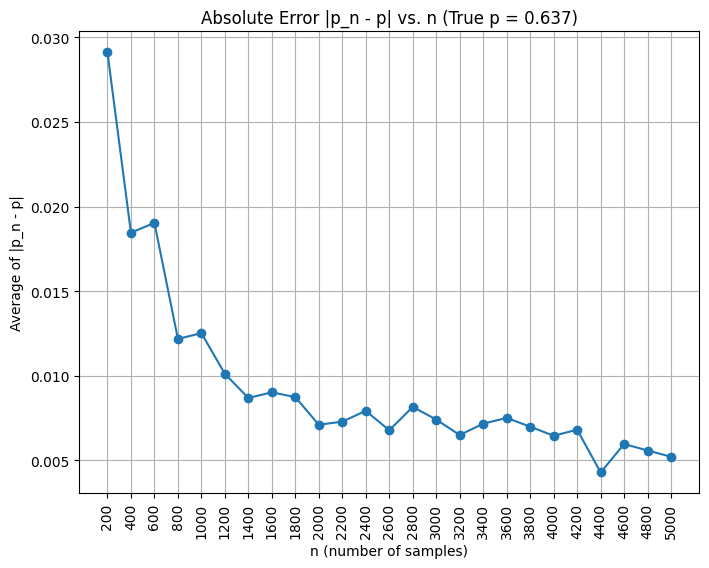

In [19]:

# 6. Plot the results
plt.figure(figsize=(8,6))
plt.plot(n_values, avg_abs_errors, marker='o')

# 7. Customize the plot
plt.title(f"Absolute Error |p_n - p| vs. n (True p = {p:.3f})")
plt.xlabel("n (number of samples)")
plt.ylabel("Average of |p_n - p|")
plt.xticks(list(n_values), rotation=90) # put tick marks at each n-value
plt.grid(True)
plt.show()

# Part 5

In [33]:
# import the normal distribution package 
from scipy.stats import norm

In [47]:
# 2. Set n and number of experiments
n1 = 200
n2 = 5000
num_experiments = 10000

In [48]:
# 3. Collect absolute errors
abs_errors_n1 = []
abs_errors_n2 = []
for _ in range(num_experiments):
    # Generate Bernoulli samples
    X1 = np.random.binomial(1, p, size=n1)
    X2 = np.random.binomial(1, p, size=n2)
    p_n1 = np.mean(X1)
    p_n2 = np.mean(X2)
    abs_errors_n1.append(abs(p_n1 - p))
    abs_errors_n2.append(abs(p_n2 - p))

abs_errors_n1 = np.array(abs_errors_n1)
abs_errors_n2 = np.array(abs_errors_n2)


In [49]:
# 4. Fit a normal distribution to |p_n - p|
#    norm.fit returns (mu, sigma)
mu_of_pn1_dist, sigma_of_pn1_dist = norm.fit(abs_errors_n1)
mu_of_pn2_dist, sigma_of_pn2_dist = norm.fit(abs_errors_n2)


## for N=200

Histogram:
N=200

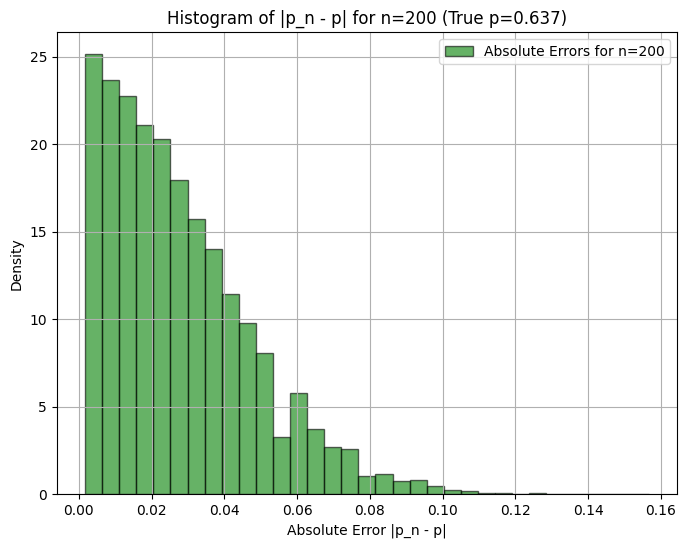

In [88]:
# 5. Plot the histogram
plt.figure(figsize=(8,6))
# 'density=True' makes it a density histogram
plt.hist(abs_errors_n1, bins=33, density=True, alpha=0.6,
         color='g', edgecolor='black', label='Absolute Errors for n=200')
plt.title("Histogram of |p_n - p| for n=200 (True p=0.637)")
plt.xlabel("Absolute Error |p_n - p|")
plt.ylabel("Density")
plt.grid(True)
xmin, xmax = plt.xlim()
plt.legend()
plt.show()


Fitted Normal Distribution: 
N=200

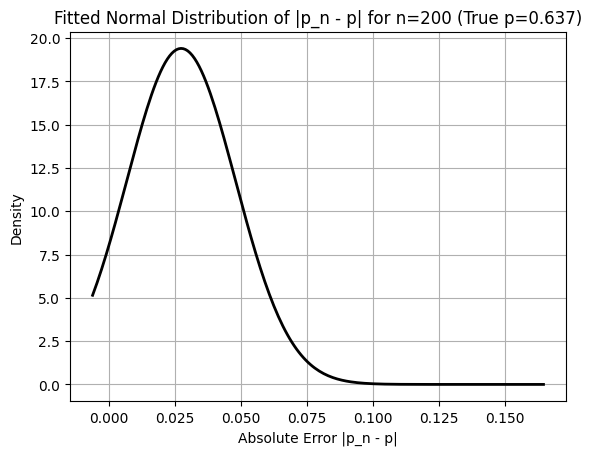

In [83]:
# 6. Plot the fitted Normal distribution
x = np.linspace(xmin, xmax, 200)
pdf = norm.pdf(x, mu_of_pn1_dist, sigma_of_pn1_dist)
plt.plot(x, pdf, 'k', linewidth=2,
         label=f'Fitted N({mu_of_pn1_dist:.4f}, {sigma_of_pn1_dist**2:.4f})')
plt.title("Fitted Normal Distribution of |p_n - p| for n=200 (True p=0.637)")
plt.xlabel("Absolute Error |p_n - p|")
plt.ylabel("Density")
plt.grid(True)

Histogram and Fitted Normal Distribution:
N=200

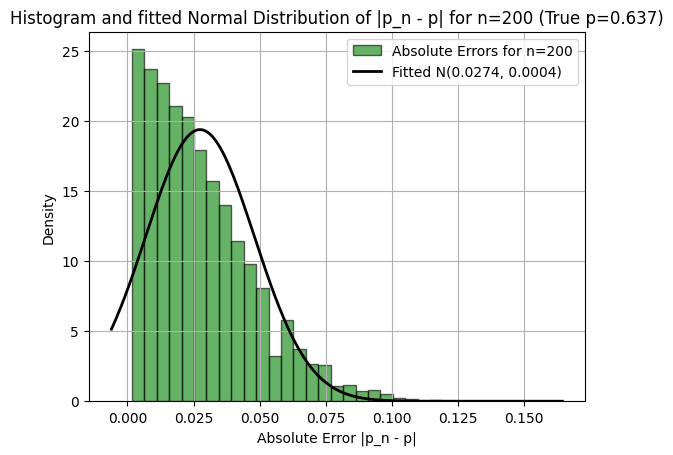

In [87]:
# 7. Customize and show
plt.hist(abs_errors_n1, bins=33, density=True, alpha=0.6,
         color='g', edgecolor='black',
         label='Absolute Errors for n=200')
plt.plot(x, pdf, 'k', linewidth=2,
         label=f'Fitted N({mu_of_pn1_dist:.4f}, {sigma_of_pn1_dist**2:.4f})')
plt.title("Histogram and fitted Normal Distribution of |p_n - p| for n=200 (True p=0.637)")
plt.xlabel("Absolute Error |p_n - p|")
plt.ylabel("Density")
plt.grid(True)

plt.legend()
plt.show()

## For N= 5000

Histogram:
N=5000

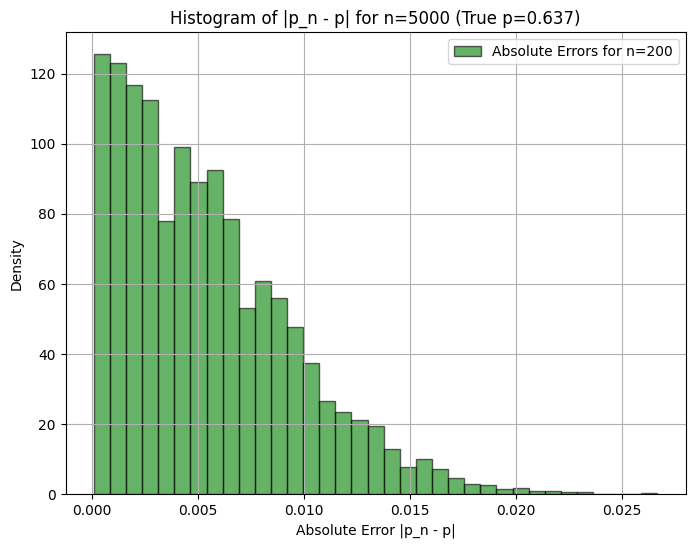

In [104]:
# 5. Plot the histogram
plt.figure(figsize=(8,6))
# 'density=True' makes it a density histogram
plt.hist(abs_errors_n2, bins=35, density=True, alpha=0.6,
         color='g', edgecolor='black', label='Absolute Errors for n=200')
plt.title("Histogram of |p_n - p| for n=5000 (True p=0.637)")
plt.xlabel("Absolute Error |p_n - p|")
plt.ylabel("Density")
plt.grid(True)
xmin, xmax = plt.xlim()
plt.legend()
plt.show()

Fitted Normal Distribution:
N=5000

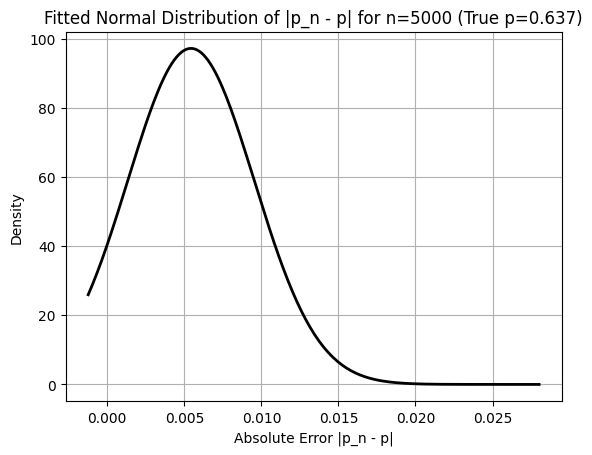

In [105]:
# 6. Plot the fitted Normal distribution
x = np.linspace(xmin, xmax, 200)
pdf = norm.pdf(x, mu_of_pn2_dist, sigma_of_pn2_dist)
plt.plot(x, pdf, 'k', linewidth=2,
         label=f'Fitted N({mu_of_pn2_dist:.4f}, {sigma_of_pn2_dist**2:.4f})')
plt.title("Fitted Normal Distribution of |p_n - p| for n=5000 (True p=0.637)")
plt.xlabel("Absolute Error |p_n - p|")
plt.ylabel("Density")
plt.grid(True)

Histogram and Fitted Normal Distribution:
N=5000

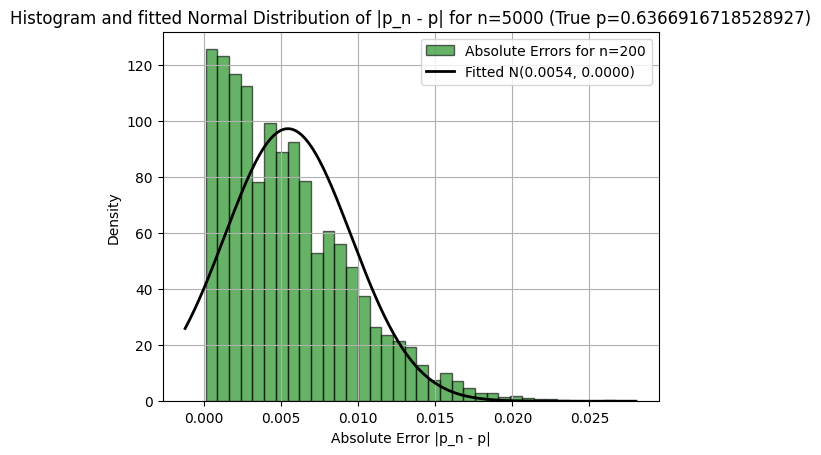

In [107]:
# 7. Customize and show
plt.hist(abs_errors_n2, bins=35, density=True, alpha=0.6,
         color='g', edgecolor='black',
         label='Absolute Errors for n=200')
plt.plot(x, pdf, 'k', linewidth=2,
         label=f'Fitted N({mu_of_pn2_dist:.4f}, {sigma_of_pn2_dist**2:.4f})')
plt.title(f'Histogram and fitted Normal Distribution of |p_n - p| for n=5000 (True p={p})')
plt.xlabel("Absolute Error |p_n - p|")
plt.ylabel("Density")
plt.grid(True)

plt.legend()
plt.show()

In [99]:
# 8. Print the fitted parameters
print(f"Fitted Normal mean (mu) for n=200     = {mu_of_pn1_dist:.6f}")
print(f"Fitted Normal variance for n=200      = {sigma_of_pn1_dist**2:.6f}")
print(f"Fitted Normal mean (mu) for n=5000     = {mu_of_pn2_dist:.6f}")
print(f"Fitted Normal variance for n=5000      = {sigma_of_pn2_dist**2:.6f}")

Fitted Normal mean (mu) for n=200     = 0.027434
Fitted Normal variance for n=200      = 0.000423
Fitted Normal mean (mu) for n=5000     = 0.005434
Fitted Normal variance for n=5000      = 0.000017
